## MSCA 31009 Machine Learning & Predictive Analytics
### Assignment 1
### Student: Duo Zhou


#### Part A: Data Cleaning & Exploratory Analysis

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
# 1. Import full data set using Pandas:
# Verify that the shape is: (864863, 74)
df = pd.read_csv('bottle.csv')
df.shape

C:\Users\zd000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(864863, 74)

In [9]:
# 2. Limit the dataset to the following columns: [T_degC, Salnty, STheta] 
# and then remove all NaN and NA values (Hint: Pandas has a method for this) .
# Verify the shape is: (812174, 3)
# select only features 'Salnty' 'STheta', 'T_degC'
df = df.loc[:,['Salnty', 'STheta', 'T_degC']]
# remove 'NA'
df = df[~df.Salnty.isna()]
df = df[~df.STheta.isna()]
df = df[~df.T_degC.isna()]
df.shape

(812174, 3)

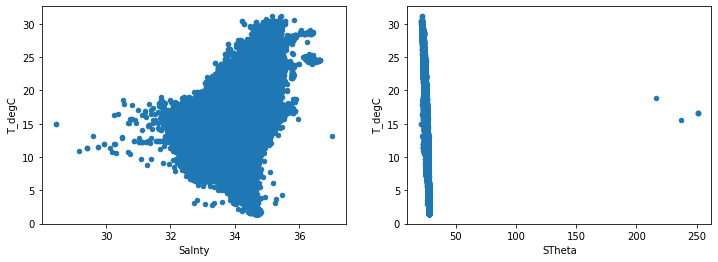

In [10]:
#3. Build the following plots using matplotlib:
#a) Scatter: Salnty (salinity of water) vs T_degC
#b) Scatter: STheta (density of water) vs T_degC
fig, ax = plt.subplots(1, 2, figsize=(12,4))

df.plot(x='Salnty', y='T_degC', ax=ax[0], kind='scatter')
df.plot(x='STheta', y='T_degC', ax=ax[1], kind='scatter')

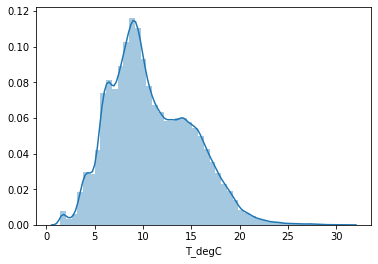

In [11]:
# 4. Build the following plot using seaborn:
# a) Distribution of T_degC (hint: distplot will be helpful here)
sns.distplot(df.T_degC)

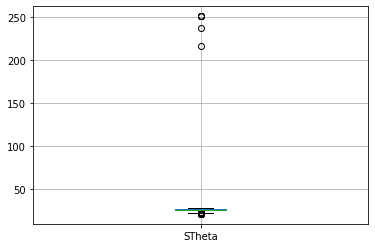

In [12]:
# 5. Remove obvious outliers from step 3b:
# Shape for clean data will be: (812168, 3)
df.boxplot(column='STheta')

In [13]:
# The question only asks to remove extreme values
# Based on the boxplot above, we can see that all the extreme values are above 200

df = df.loc[df['STheta']<=200]
df.shape

(812168, 3)

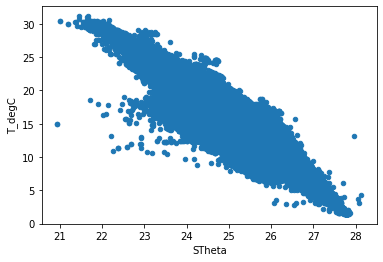

In [14]:
# 6. Plot 3b again – does it look better? Explain!
df.plot(x='STheta', y='T_degC',kind='scatter')

The scatter plot of STheta vs. T_degC looks much better wiht outliers removed. The X axis is now scaled to fit the majority non-extreme data points. The plot shows a nice linear trend between STheta and T_degC. 

#### Part B: Train & Test Split:

As we know, we must generate a training set for model building and a testing set for model validation. Feel free to perform these steps however you want, but please note that sklearn has a `train_test_split` class that is perfect for this type of work: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Our X matrix (features / independent variables) will be: [Salnty, STheta]

Our y matrix (target / dependent variable) will be: T_degC

Build out the following:
- X_train
- X_test
- y_train
- y_test

Make sure to add a seed (called random_state in train_test_split) so your split is reproducible.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X= df.loc[:,('Salnty','STheta')]
y=df.loc[:,'T_degC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Insert a column of 1s to find an intercept 
X_train.insert(0, 'intercept', 1)
X_test.insert(0, 'intercept', 1)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(568517, 3) (243651, 3) (568517,) (243651,)


#### Part C: Linear Regression Using Normal Equation - Coded In Python

We will start by building our linear regression model using numpy. If you need help for this, please refer to https://github.com/ageron/handson-ml (Links to an external site.) where a similar example can be found under Chapter 4. 

We will use the closed-form solution called the Normal Equation to solve the following:

1. Build the normal equation using numpy & fit using your training data (X_train & y_train).
   Note: Make sure to include an intercept value of 1 for every observation in your X_train.
    $\theta = (X^{T}X)^{-1}X^{T}Y$
  
2. Print out the coefficients - we will need to compare these to the output in Part 4

In [18]:
#Normal Equation
theta =  np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T.dot(y_train))

theta

array([35.65044819,  3.11107278, -5.03872733])

3. Predict T_degC for the test data using the fitted values in b.

   Make sure to include an intercept value of 1 for every observation in your X_test. <br>
   Call predictions y_pred

In [19]:
y_pred= theta[0] + theta[1] * X_test.Salnty + theta[2] * X_test.STheta

4. Calculate the following for the test data:
   
    mean squared error
    
    r-squared
    
    explained variance

Note: https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

#### Mean Square Error

$$MSE =\frac{\sum_{i=1}^n{(\hat{y}_{i} - y_{i})^2}}{n} $$

In [20]:
MSE=((y_pred - y_test)**2).sum() / len(y_test)
print('The Mean Square Error is ',MSE)

The Mean Square Error is  0.2330764573476252


#### Explained Variance
Explained Variance is the total variance minus the Mean Squared Error of the predictions

In [21]:
total_var = ((y_test - y_test.mean())**2).mean()
exp_var= total_var-MSE
print('The Explained Variance is', exp_var)

The Explained Variance is 17.58955815447355


#### R2
R2 is the percentage of the variance explained out of the total variance

In [22]:
R2=exp_var/total_var
print('R2 is', R2)

R2 is 0.9869224465167998


5. Create a scatterplot that shows actual versus predicted values for the T_degC.

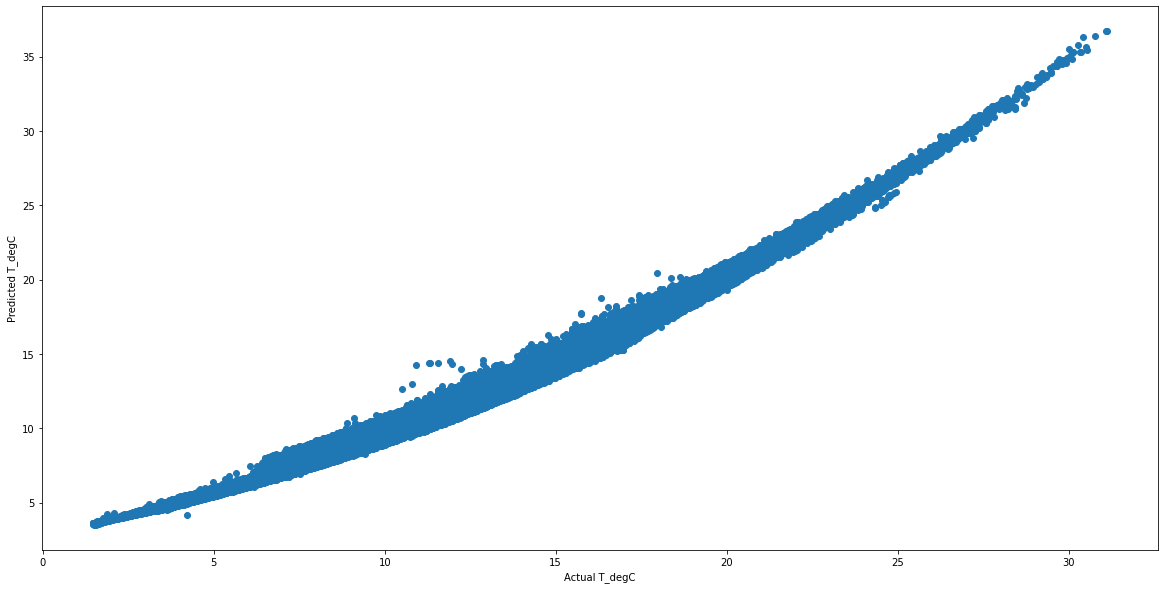

In [23]:
plt.figure(figsize=(20,10))
plt.plot(y_test, y_pred,'o')
plt.xlabel('Actual T_degC')
plt.ylabel('Predicted T_degC');

#### Part D: Using sklearn API

sklearn is a fantastic tool within python full of various model classes. For this portion of the assignment, use the class LinearRegression to replicate work done in Part C. Specifically, you should create an instance of the following class:

https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares (Links to an external site.)

1. Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train & y_train.
    Note: sklearn will automatically add the intercept term, so you do not need to do this here. 
2. Print out the coefficients (including the intercept)
    Note: These should be EXACTLY the same as what you found in Part C step 2
3. Predict T_degC for the test data using the fitted values in b.
4. Call predictions y_pred_sklearn
5. Calculate the following for the test data:
    
    mean squared error
    
    r-squared
    
    explained variance
6. Create a scatterplot that shows actual versus predicted values for the T_degC.

In [24]:
from sklearn import linear_model

In [25]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
print('Coefficients: \n', lin_reg.coef_)
print('Intercept: \n', lin_reg.intercept_)

Coefficients: 
 [ 0.          3.11107278 -5.03872733]
Intercept: 
 35.65044819419838


In [30]:
y_pred_sklearn = lin_reg.predict(X_test)
MSE_sk=((y_pred_sklearn - y_test)**2).sum() / len(y_test)
print('The Mean Square Error is ',MSE_sk)
exp_var_sk= total_var-MSE_sk
print('The Explained Variance is', exp_var_sk)
R2_sk = lin_reg.score(X_test, y_test)
print('R2 is', R2_sk)

The Mean Square Error is  0.2330764573474977
The Explained Variance is 17.58955815447368
R2 is 0.9869224465168048


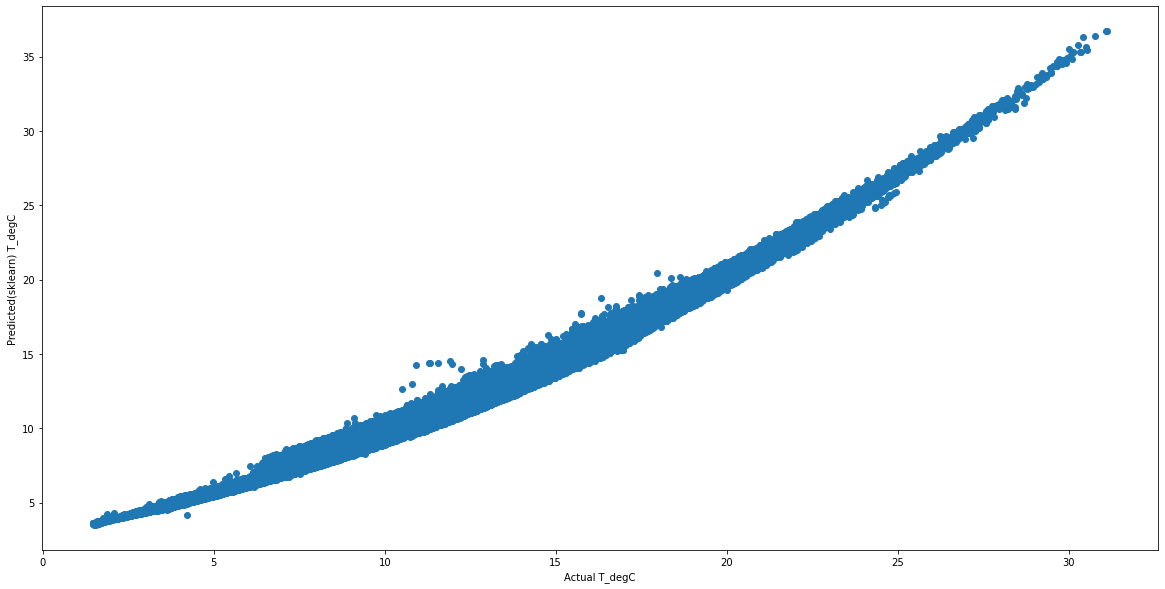

In [31]:
plt.figure(figsize=(20,10))
plt.plot(y_test, y_pred_sklearn,'o')
plt.xlabel('Actual T_degC')
plt.ylabel('Predicted(sklearn) T_degC');

#### Part E: Conceptual Questions

##### 1. Why is it important to have a test set?

The point of a test set is to give you a final, unbiased performance measure of your entire model building process. This includes all modelling decisions in your pipeline, so any preprocessing, algorithm selection, feature engineering, feature selection, hyper parameter tuning and how you trained your model in general. All of these decisions can lead to overfitting; for instance, selecting a set of hyperparameters that are coincidentally optimal for a particular validation set but not for the general population. If we have no test set you would not be able to identify this and would potentially be reporting highly optimistic scores.

##### 2. If the normal equation always provides a solution, when would we not want to use it?

It’s slow — having a short, nice equation does not mean that computing it is fast. Matrix multiplication is O(n³), inversion is also O(n³). This is actually slower than gradient descent for even modest sized datasets.

Matrix multiplication X^T * X squares the condition number of the matrix, and later we have to additionally multiply the result by X^T. This can make the results extremely unstable. 

X^T * X can be non-invertible. That is why scikit learn uses the Moore-Penrose pseudoinverse.

The normal equation does not take overfitting into consideration. Regularization should be employed to prevent overfitting.

##### 3. How might we improve the fit of our models from Part C & D?
##### Note: There are lots of possible answers to this section - just describe one in detail. 

Add interaction terms to model how two or more independent variables together impact the target variable.
An interaction will help to improve the model when an independent variable has a different effect on the response depending on the values of another independent variable.

##### 4. As we move further into Machine Learning, we will need to continually consider the bias-variance tradeoff. Explain what bias is and what variance is in regards to the bias-variance tradeoff. 

The bias error is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).

The variance is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).

##### 5. In a linear regression model, how might we reduce bias?
As a statistical/Machine Learning method tries to match data points more closely or when a more flexible method is used, the bias reduces.

##### 6. In a linear regression model, how might we reduce variance? 

Reducing number of features in the predictor set can reduce vriance. Regularization term in loss function can be employed to help reduce variance hence preventing overfitting.